In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

    Values
        height --> 160
        height --> 200
        weight --> 60
        1. magnitude
            160
            200
            60
        2. units
            cm
            cm
            kg
            
       
       

### Transformation

    1. Standarization
            Values are transform such that the overall mean becomes 0 and SD becomes 1
            
$$ formula = \frac{x - u} {\sigma} $$
            
    2. Normalization
            In this case the values lies between 0 to 1
            
$$ formula = \frac{x - min(x)} {max(x) - min(x)} $$

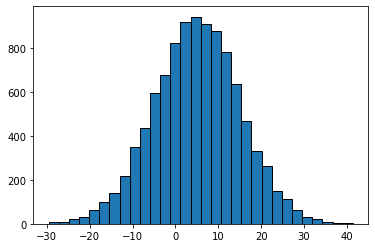

In [3]:
plt.hist(np.random.normal(5, 10, 10000), bins=30, ec='k')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
mpg = sns.load_dataset("mpg")

In [6]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


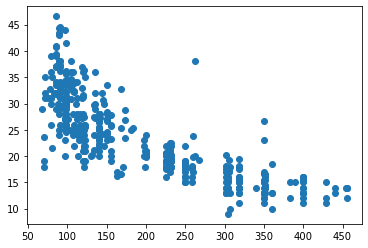

In [9]:
plt.plot(mpg['displacement'], mpg['mpg'], 'o')

In [10]:
np.corrcoef(mpg['displacement'], mpg['mpg'])

array([[ 1.        , -0.80420282],
       [-0.80420282,  1.        ]])

In [11]:
feature = mpg[['displacement']]
target = mpg['mpg']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [15]:
## L2 Norm Loss, l2 Penalty --> MSE

    1. Splitting
    2. We will scale the training data by fitting
        and transform it 
    3. We will use this transformed data to learn our model
    4. We will transform the testing data
    5. Use the transformed test data for prediction

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target)

In [17]:
X_train.__len__()

298

In [18]:
len(X_test)

100

In [19]:
len(Y_train)

298

In [20]:
len(Y_test)

100

In [21]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [31]:
X_train.mean()

displacement    195.615772
dtype: float64

In [38]:
abs(X_train.mean() - X_train).sum()/len(X_train)

displacement    91.653248
dtype: float64

In [40]:
np.sqrt(((X_train.mean() - X_train)**2).sum()/len(X_train))

displacement    103.633911
dtype: float64

In [43]:
X_train.std(axis=0)

displacement    103.808232
dtype: float64

In [26]:
scale.scale_ # std 

array([103.63391065])

In [22]:
scale.mean_

array([195.61577181])

In [24]:
scale.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [44]:
X_train_trans = scale.transform(X_train)

In [47]:
round(X_train_trans.mean())

0

In [46]:
X_train_trans.std()

1.0

In [51]:
model = LinearRegression()
model.fit(X_train_trans, Y_train)

LinearRegression()

In [54]:
model.predict(X_test) # we are testing different values

array([ -815.66880586, -1412.2476077 ,  -542.23685502, -2356.83071062,
        -579.52303013, -1219.60236961, -1952.89714687, -1374.96143259,
        -728.66773059, -2798.05044948,  -585.73739265, -2711.04937422,
       -1039.38585655,  -579.52303013,  -734.88209311,  -846.74061846,
        -504.9506799 ,  -579.52303013,  -728.66773059, -1418.46197022,
        -946.17041877,  -734.88209311,  -846.74061846,  -579.52303013,
        -579.52303013, -2711.04937422, -2157.97111001,  -542.23685502,
       -1530.32049557,  -542.23685502, -1418.46197022,  -504.9506799 ,
        -529.80812998, -2151.75674749,  -666.5241054 , -2462.47487345,
        -579.52303013,  -846.74061846, -2804.264812  , -1418.46197022,
        -579.52303013, -1530.32049557, -2213.90037268, -2642.6913865 ,
       -1418.46197022,  -623.02356777, -1374.96143259,  -579.52303013,
        -728.66773059, -2151.75674749,  -629.23793029, -2157.97111001,
        -697.595918  ,  -492.52195486, -1604.8928458 ,  -946.17041877,
      

In [56]:
test_trans = scale.transform(X_test)

In [58]:
pred = model.predict(test_trans)

In [59]:
r2_score(Y_test, pred)

0.6375172872264374

In [60]:
mean_absolute_error(Y_test, pred)

3.4867492554059503

In [64]:
dis = 400
model.predict(scale.transform([[dis]]))

array([11.0143226])

### PIPELINE

    Cleaning --> Transform --> Model --> deployment

In [65]:
from sklearn.pipeline import Pipeline

In [84]:
pipe = Pipeline([
    ('scale', StandardScaler()),
])

In [77]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 <class 'sklearn.linear_model._base.LinearRegression'>)])

In [78]:
model

LinearRegression()

In [79]:
scale

StandardScaler()

In [80]:
X_train

,displacement
164,231.0
396,120.0
201,250.0
189,304.0
1,350.0
...,...
258,231.0
46,140.0
238,98.0
178,120.0


In [85]:
pipe.fit(X_train)

Pipeline(steps=[('scale', StandardScaler())])

In [89]:
X_train_trans[:5]

array([[ 0.34143484],
       [-0.72964314],
       [ 0.52477252],
       [ 1.04583748],
       [ 1.48970764]])

In [90]:
pipe.transform(X_train)[:5]

array([[ 0.34143484],
       [-0.72964314],
       [ 0.52477252],
       [ 1.04583748],
       [ 1.48970764]])

    pipeline
        imputer --> scaling

    Make your own transformer which will scale the data
    Then create a pipeline object and use your transformer